Test LiveOcean BC's for new tidally average single time files

In [9]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
from salishsea_tools.LiveOcean_BCs import create_LiveOcean_TS_BCs

%matplotlib inline

In [2]:
# choose a date
ymd = '2017-10-20'
date = ymd.replace("-", "")

In [4]:
# make yourself a test directory
bc_dir = '/results/forcing/LiveOcean/modified/testdir'
os.mkdir(bc_dir)

FileExistsError: [Errno 17] File exists: '/results/forcing/LiveOcean/modified/testdir'

In [5]:
ourdatas = create_LiveOcean_TS_BCs(
    ymd,
    ymd,
    '1D',
    'daily',
    teos_10=True,
    nowcast=False,
    single_nowcast=True,
    basename='single_LO',
    bc_dir=bc_dir,
    LO_dir='/results/forcing/LiveOcean/downloaded/',
    NEMO_BC='/results/nowcast-sys/tracers/west/SalishSea_west_TEOS10.nc'
)

In [6]:
ourdata = nc.Dataset(ourdatas[0])
print(ourdata)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creator_url: https://salishsea-meopar-docs.readthedocs.org/
    summary: Temperature and Salinity from the Live Ocean model interpolated in space onto the Salish Sea NEMO Model western open boundary.
    creator_name: Salish Sea MEOPAR Project Contributors
    institution: UBC EOAS
    acknowledgements: Live Ocean http://faculty.washington.edu/pmacc/LO/LiveOcean.html
    source: http://nbviewer.jupyter.org/urls/bitbucket.org/salishsea/analysis-nancy/raw/tip/notebooks/LiveOcean/Interpolating%20Live%20Ocean%20to%20our%20boundary.ipynb
    creator_email: nsoontie@eos.ubc.ca
    history: [2017-10-22] File creation.
    institution_fullname: Earth, Ocean & Atmospheric Sciences, University of British Columbia
    dimensions(sizes): yb(10), xbT(87), deptht(40), time_counter(1)
    variables(dimensions): float32 nav_lat(yb,xbT), float32 nav_lon(yb,xbT), float32 deptht(deptht), int64 time_counter(time_coun

In [7]:
print(ourdata.variables['time_counter'])
print(ourdata.variables['time_counter'][:])

<class 'netCDF4._netCDF4.Variable'>
int64 time_counter(time_counter)
    units: days since 2017-10-20 00:00:00
    time_origin: 2017-10-20 00:00:00
    long_name: Time axis
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of -9223372036854775806 used

[0]


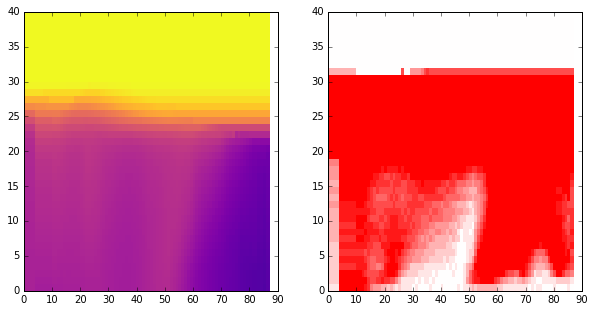

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pcolormesh(ourdata.variables['vosaline'][0, :, 1, :], cmap='plasma', vmax=34, vmin=31.5)
ds = ourdata.variables['vosaline'][0, 1:, :, :] - ourdata.variables['vosaline'][0, :-1, :, :]
ax[1].pcolormesh(ds[:, 1], cmap='bwr', vmax=0.01, vmin=-0.01)

In [10]:
livedata = nc.Dataset(os.path.join('/results/forcing/LiveOcean/downloaded',date,'low_passed_UBC.nc'))

In [11]:
print(livedata)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file: /pmr1/parker/LiveOcean_roms/output/cascadia1_base_lobio1/f2017.07.20/ocean_his_0002.nc
    format: netCDF-3 64bit offset file
    Conventions: CF-1.4
    type: ROMS/TOMS history file
    title: First LiveOcean input file
    rst_file: /pmr1/parker/LiveOcean_roms/output/cascadia1_base_lobio1/f2017.07.20/ocean_rst.nc
    his_base: /pmr1/parker/LiveOcean_roms/output/cascadia1_base_lobio1/f2017.07.20/ocean_his
    grd_file: /fjdata1/parker/LiveOcean_data/grids/cascadia1/grid.nc
    ini_file: /pmr1/parker/LiveOcean_roms/output/cascadia1_base_lobio1/f2017.07.19/ocean_his_0025.nc
    frc_file_01: /fjdata1/parker/LiveOcean_output/cascadia1_base/f2017.07.20/tide/tides.nc
    frc_file_02: /fjdata1/parker/LiveOcean_output/cascadia1_base/f2017.07.20/atm/lwrad_down.nc
    frc_file_03: /fjdata1/parker/LiveOcean_output/cascadia1_base/f2017.07.20/atm/Pair.nc
    frc_file_04: /fjdata1/parker/LiveOcean_output

Don't forget to remove your test files and directory